In [1]:
import string

# data manipulation & vizualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# nltk imports
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [2]:
df = pd.read_csv("dataset/flipkart_com-ecommerce_sample.csv")

df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."


In [3]:
print(df.shape)

(20000, 15)


In [4]:
df = df[["product_category_tree", "description"]]

df.head(3)

,product_category_tree,description
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...


In [5]:
df.isnull().sum()

product_category_tree    0
description              2
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
def get_primary_category(product_category_tree):
    categories = product_category_tree.split(">>")
    if len(categories) == 1:
        return categories[0][2:-2].strip()
    else:
        return categories[0][2:].strip()
    
    
df["product_category_tree"] = df["product_category_tree"].apply(get_primary_category)

df.head(3)

,product_category_tree,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
1,Furniture,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,Footwear,Key Features of AW Bellies Sandals Wedges Heel...


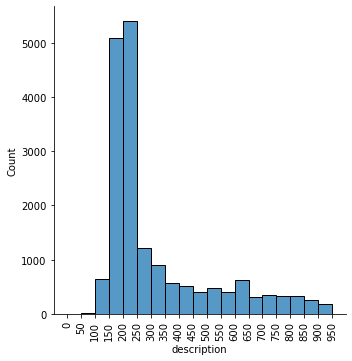

In [8]:
bins = np.arange(0, 1000, 50)
sns.displot(df["description"].str.len(), bins=bins)
plt.xticks(bins, rotation=90)
plt.show()

# no of characters present in each description lies between 100 and 950 and mostly falls between 100 and 350

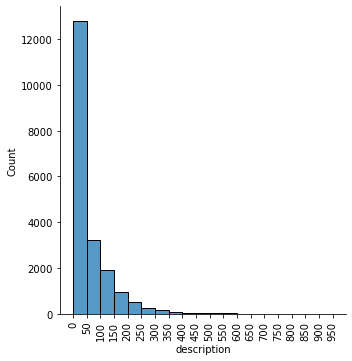

In [9]:
bins = np.arange(0, 1000, 50)
sns.displot(df["description"].str.split().apply(lambda x: len(x)), bins=bins)
plt.xticks(bins, rotation=90)
plt.show()

# no of words present in each description lies between 0 and 400 and mostly falls between 0 and 150

<AxesSubplot:>

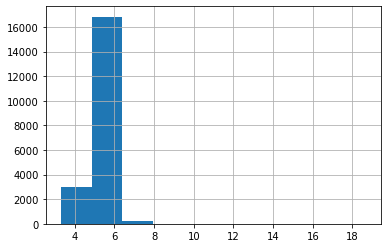

In [10]:
df['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

# average word length in each description lies between 4 to 6 

In [11]:
# The graph is left skewed due to the no of stopwords in description 
# Analyzing the amount and the types of stopwords can give us some good insights into the data

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stops = set(stopwords.words('english'))

print(stops)

{'this', 'nor', 'off', 'wasn', 'under', 'been', 'myself', 'and', 'do', 'couldn', 'your', 'aren', 'mustn', 'won', 'then', "didn't", 'which', 'did', 't', 'wouldn', "doesn't", 'how', 'her', 'hasn', 'our', 'where', 'own', 'being', 'hers', 'hadn', 'because', 'there', "you've", 'has', 'now', "won't", 'doing', 'it', 'can', 'during', 've', 'haven', 'ours', "you're", "mustn't", "shouldn't", "weren't", 'ourselves', 'but', 'after', "shan't", 'for', 'to', 'is', 'from', 'itself', 'below', "that'll", "needn't", 'me', 'not', 'don', 'd', 'at', 'against', 'between', 'once', 'when', 'she', 'about', 'yours', 'of', 'most', "couldn't", 'down', 'he', 'his', 'here', 's', 'should', 'have', 'or', 'o', "hasn't", 'themselves', 'any', 'an', "hadn't", 'some', 'my', 'am', 'that', 'having', 'a', 'himself', 'few', 'its', "don't", 'yourselves', 'very', 'ma', 'needn', 'before', 'no', 'too', 'be', 'up', 'again', 're', "isn't", 'more', "you'll", "you'd", 'who', 'had', 'into', 'them', 'the', 'just', 'i', 'shan', 'those', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


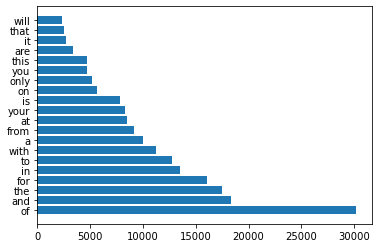

In [12]:
corpus = []
new = df['description'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stops:
        dic[word] += 1
        
top_stopwords = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:20] 
x, y = zip(*top_stopwords)
plt.barh(x, y)
plt.show()

# we can can clearly see that stopwords such as ('of', 'and', 'the', ..) appear very frequently in the desription column

<AxesSubplot:>

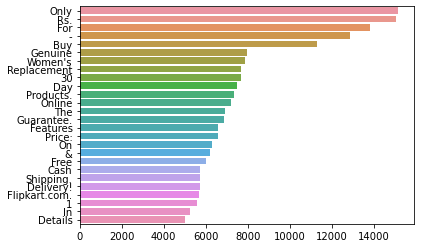

In [13]:
# apart from stopwords, we need to find the words which appear the most in the description 

from collections import Counter
counter = Counter(corpus)
most_comm = counter.most_common()

x, y= [], []
for word, count in most_comm[:40]:
    if word not in stops:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y, y=x)

# we can clearly see that we have some top stopwords in other cases also, and words such as ('Genuine', 'Women's', 
# 'Replacement') occur very frequently

<AxesSubplot:>

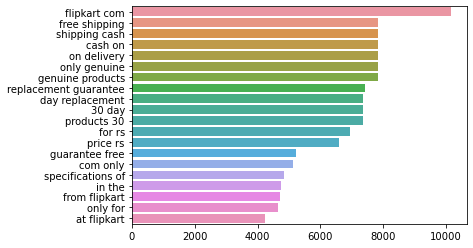

In [14]:
# Ngram exploration
# Looking at most frequent n-grams can give you a better understanding of the context 

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams = get_top_ngrams(df["description"], 2)[:20] 
x, y=map(list, zip(*top_n_bigrams)) 
sns.barplot(x=y, y=x)

# we can see some top bigrams contain phrases such as free shipping, flipkart com, cash on, only genuine etc
# which seem to be generic and not useful to classify products into their categories

<AxesSubplot:>

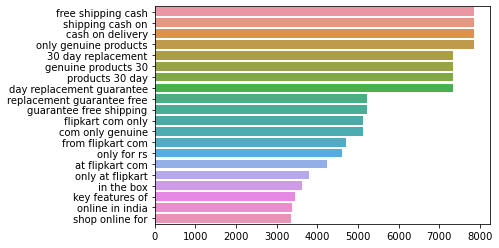

In [15]:
top_tri_grams = get_top_ngrams(df["description"], n=3)
x,y = map(list, zip(*top_tri_grams))
sns.barplot(x=y, y=x)

# top trigrams too show the same behaviour of generic terms appearing frequently

In [16]:
my_stops = ['flipkart', 'com', 'shipping', 'cash', 'buy', 'products', 'online', 'shop', 'cash', 'delivery', 'free', 
           'genuine', 'replacement', '30', 'day', 'guarantee', 'rs', 'box', 'key', 'features', 'india', 'flipkart.com', 
            'details', 'specification', 'warranty', 'sale', 'purchase']

stops.update(my_stops)
stops.update(string.punctuation)

In [17]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for desc in df["description"]:
        words = [w.lower() for w in word_tokenize(desc) if (w.lower() not in stops)]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        corpus.append(words)
    return corpus

corpus = preprocess_news(df)
print(len(corpus))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


19998


In [18]:
import gensim

dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

C:\Users\kusha\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [19]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.013*"material" + 0.012*"color" + 0.011*"type" + 0.009*"specification" + 0.009*"general" + 0.008*"product" + 0.008*"model" + 0.008*"brand" + 0.007*"number" + 0.007*"inch"'),
 (1,
  '0.019*"gold" + 0.017*"set" + 0.016*"diamond" + 0.014*"necklace" + 0.014*"alloy" + 0.013*"cover" + 0.013*"price" + 0.012*"ring" + 0.010*"yellow" + 0.010*"bangle"'),
 (2,
  '0.021*"men" + 0.020*"fabric" + 0.018*"cotton" + 0.015*"woman" + 0.014*"neck" + 0.014*"sleeve" + 0.013*"t-shirt" + 0.012*"price" + 0.011*"solid" + 0.011*"casual"'),
 (3,
  '0.036*"woman" + 0.027*"collection" + 0.024*"huge" + 0.024*"clothes" + 0.023*"apparel" + 0.023*"branded" + 0.014*"bra" + 0.014*"price" + 0.013*"casual" + 0.011*"sticker"')]

In [20]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

ModuleNotFoundError: No module named 'pyLDAvis.gensim'

C:\Users\kusha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


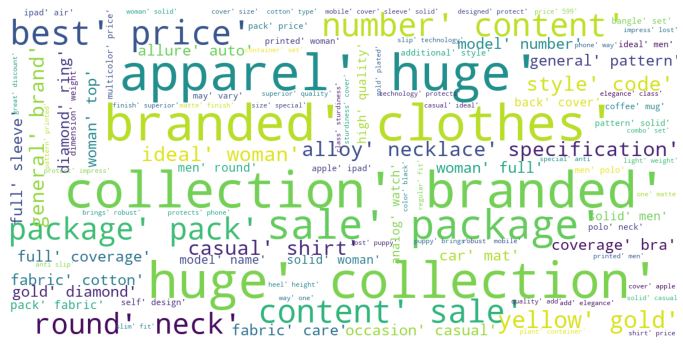

In [22]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stops,
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        random_state=1)
   
    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)